In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

## Exercise 2

In [2]:
def get_data():
    x_grid, y_grid = np.mgrid[-2:2:1/25, -2:2:1/25]
    x_pos = x_grid.ravel()
    y_pos = y_grid.ravel()
    bias = np.ones(len(x_pos))
    return np.array([bias,x_pos,y_pos]).T

def sigmoid(x):
    return 1 / (1+np.exp(-x))

def threshold(x):
    return (x>0)*1

In [3]:
data = get_data()
data[:6,:]

array([[ 1.  , -2.  , -2.  ],
       [ 1.  , -2.  , -1.96],
       [ 1.  , -2.  , -1.92],
       [ 1.  , -2.  , -1.88],
       [ 1.  , -2.  , -1.84],
       [ 1.  , -2.  , -1.8 ]])

In [4]:
def plot_grid(predictions):
    plt.figure()
    sns.scatterplot(x=data[:,1],y=data[:,2], hue=predictions, marker="s",s=11)
    plt.plot((1.25,-1.25),(1.25,-1.25),'k')
    plt.plot((1.25,-1.25),(-1.25,1.25),'k')
    plt.plot((-1,-1),(-1.5,1.5),'k')
    plt.plot((1,1),(-1.5,1.5),'k')
    plt.show()

#### First hidden layer

In [5]:
def plot_decision_boundary_first_hidden(a0,a1,a2):
    a = np.array([a0,a1,a2])
    predictions = threshold(data@a)
    plot_grid(predictions)

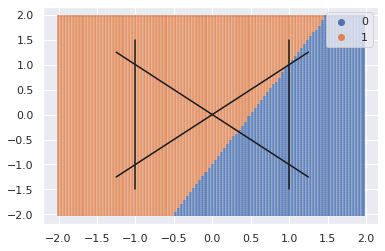

In [6]:
plot_decision_boundary_first_hidden(1, -2, 1)

In [7]:
weights1 = np.array([
    [1,1,1,0,0],
    [0,-1,1,1,1],
    [0,0,0,-1,1]
])

In [8]:
weights1.shape

(3, 5)

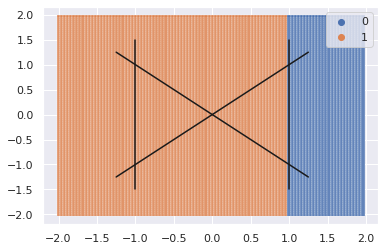

In [9]:
plot_decision_boundary_first_hidden(weights1[0, 1], weights1[1, 1], weights1[2, 1]);

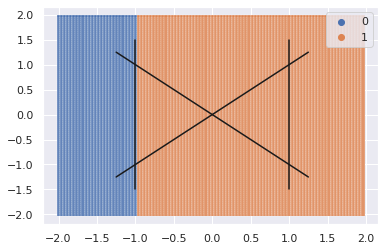

In [10]:
plot_decision_boundary_first_hidden(weights1[0, 2], weights1[1, 2], weights1[2, 2]);

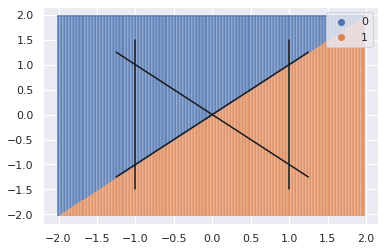

In [11]:
plot_decision_boundary_first_hidden(weights1[0, 3], weights1[1, 3], weights1[2, 3]);

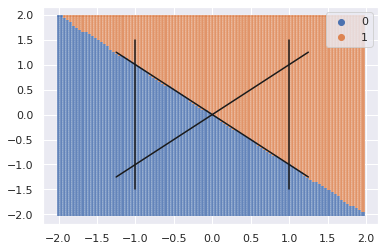

In [12]:
plot_decision_boundary_first_hidden(weights1[0, 4], weights1[1, 4], weights1[2, 4]);

In [13]:
(data @ weights1)

array([[ 1.  ,  3.  , -1.  ,  0.  , -4.  ],
       [ 1.  ,  3.  , -1.  , -0.04, -3.96],
       [ 1.  ,  3.  , -1.  , -0.08, -3.92],
       ...,
       [ 1.  , -0.96,  2.96,  0.08,  3.84],
       [ 1.  , -0.96,  2.96,  0.04,  3.88],
       [ 1.  , -0.96,  2.96,  0.  ,  3.92]])

In [14]:
hidden1 = threshold(data @ weights1)

In [15]:
hidden1.shape[0] == data.shape[0]

True

In [16]:
hidden1.shape[1] == 5

True

In [17]:
hidden1.min(), hidden1.max()

(0, 1)

In [18]:
def plot_decision_boundary_second_hidden(b0, b1, b2, b3, b4):
    b = np.array([b0,b1,b2,b3,b4])
    predictions = threshold(hidden1@b)
    plot_grid(predictions)
    

#### Second hidden layer

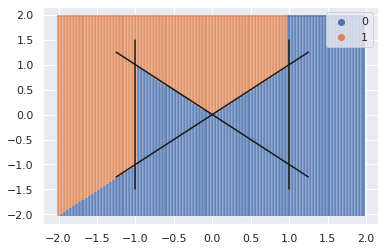

In [19]:
plot_decision_boundary_second_hidden(-2,3,-1,-3,1)

In [20]:
weights2 = np.array([
    [1,-5,-1],
    [0,2,0],
    [0,0,2],
    [0,2,-2],
    [0,2,-2],
])

In [21]:
weights2.shape

(5, 3)

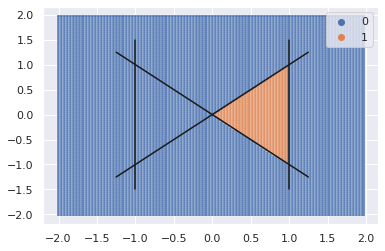

In [22]:
plot_decision_boundary_second_hidden(weights2[0, 1], weights2[1, 1], weights2[2, 1], weights2[3, 1], weights2[4, 1]);

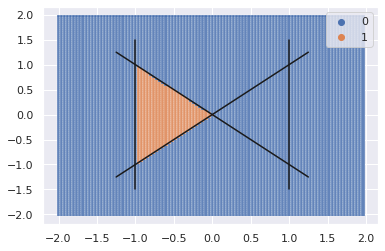

In [23]:
plot_decision_boundary_second_hidden(weights2[0, 2], weights2[1, 2], weights2[2, 2], weights2[3, 2], weights2[4, 2]);

In [24]:
hidden2 = threshold(hidden1@weights2)

In [25]:
hidden2.shape[0] == data.shape[0]

True

In [26]:
hidden2.shape[1] == 3

True

In [27]:
hidden2.min(), hidden2.max()

(0, 1)

#### Output layer

In [28]:
def plot_decision_boundary_output(c0, c1, c2):
    c = np.array([c0,c1,c2])
    predictions = hidden2@c
    plot_grid(predictions)

In [29]:
weights3= np.array([0,1,1])

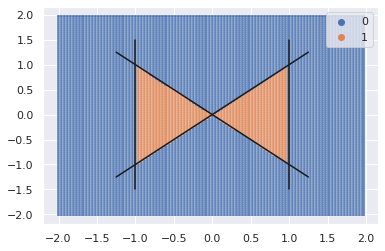

In [30]:
plot_decision_boundary_output(weights3[0], weights3[1], weights3[2]);

In [31]:
output = hidden2@weights3

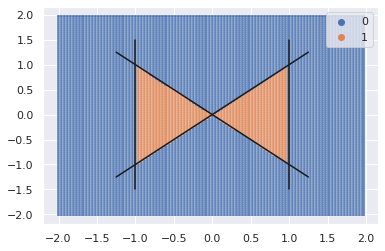

In [32]:
plot_grid(output)